# Tree-based ML and Feature Selection

**This week, your assignment is:**

- break our data into features and targets, and train and test sets
- use sklearn to fit a decision tree to the training data
    - plot the decision tree
    - change the max_depth of the decision tree to improve the model if needed (or tune it with a hyperparameter search)
- plot the correlations between features and targets
- use sklearn to fit a random forest model to predict churn from our dataset
    - plot the feature importances from the random forest
- choose some of the less-important features to remove from the model using feature importances and correlations and fit the random forest model to the new data
    - examine the feature importances after removing less important features
- write a short analysis of the results of your work


***Optional* advanced tasks:**
- use H2O to fit a random forest to our original, unmodified data (missing values and all)
    - you can decide if you want to break the data into train and test sets or not, but remember it's best to evaluate performance on a test or validation dataset
    - plot the H2O random forest's feature importances
- tune the random forest hyperparameters for the sklearn and/or H2O models
- use forward and/or backward selection with feature importances from a random forest model
- use recursive feature selection
- compare the various feature selection methods you tried and write a short summary

## Load data

First, let's load our preprocessed data from a few weeks ago and create features, targets, and train/test splits.

In [1]:
import phik
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from scikitplot.estimators import plot_feature_importances
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/prepared_churn_data.csv', index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_per_tenure
customerID,,,,,,,,
7590-VHVEG,1.0,0,0,3,29.85,29.85,0,29.850000
5575-GNVDE,34.0,1,1,2,56.95,1889.50,0,55.573529
3668-QPYBK,2.0,1,0,2,53.85,108.15,1,54.075000
7795-CFOCW,45.0,0,1,1,42.30,1840.75,0,40.905556
9237-HQITU,2.0,1,0,3,70.70,151.65,1,75.825000
...,...,...,...,...,...,...,...,...
6840-RESVB,24.0,1,1,2,84.80,1990.50,0,82.937500
2234-XADUH,72.0,1,1,0,103.20,7362.90,0,102.262500
4801-JZAZL,11.0,0,0,3,29.60,346.45,0,31.495455


In [3]:
features = df.drop('Churn', axis=1)
targets = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)

Let's remind ourselves of the no information rate.

In [4]:
targets.value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [5]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [6]:
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.8602801968951155
0.7694491766042022


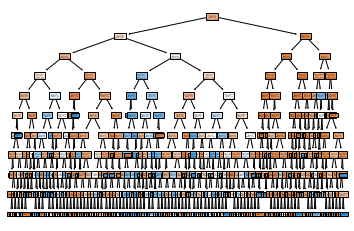

In [7]:
_ = plot_tree(dt, filled=True)

We can see the decision tree is overfitting, since the train score is higher than the test score by a considerable amount. We can also see from the plot of the tree that it is very large and complex, which makes sense as to why it's overfitting. Let's decrease the max_depth and try again. 

In [8]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.7870124952669444
0.7751277683134583


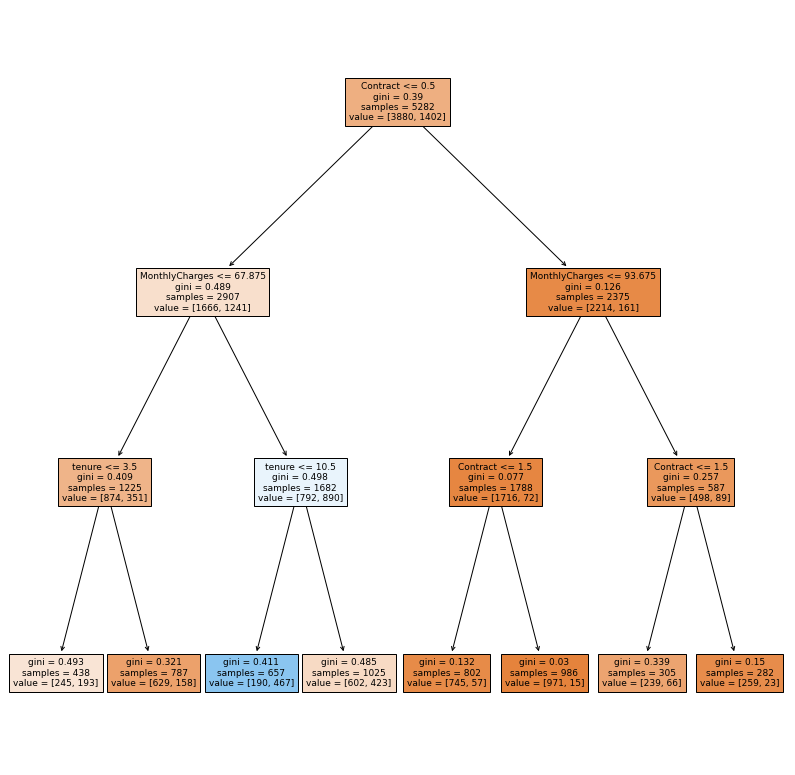

In [9]:
f = plt.figure(figsize=(14, 14))
_ = plot_tree(dt, fontsize=9, feature_names=features.columns, filled=True)

## Correlations

We'll look at both Pearson and phi-k correlations here.

<AxesSubplot:>

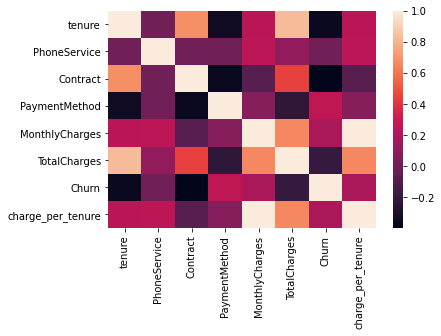

In [10]:
sns.heatmap(df.corr())

interval columns not set, guessing: ['tenure', 'PhoneService', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'charge_per_tenure']


<AxesSubplot:>

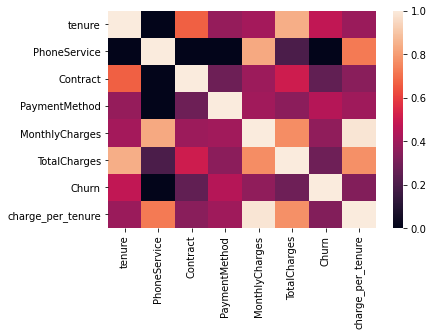

In [11]:
sns.heatmap(df.phik_matrix())

It looks like PhoneService has a low correlation with churn. Next lowest seems to be Contract and TotalCharges.

## Random forest and feature importance

In [12]:
rf = RandomForestClassifier(max_depth=5, random_state=42)
rf.fit(x_train, y_train)

print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.8051874290041651
0.7915956842703009


<AxesSubplot:title={'center':'Feature Importance'}>

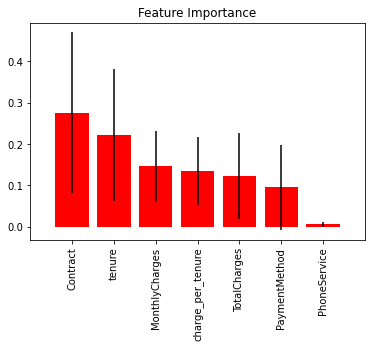

In [13]:
plot_feature_importances(rf, feature_names=features.columns, x_tick_rotation=90)

Let's remove phone service, since the rest of the feature have comparable importances.

In [14]:
new_features = features.drop('PhoneService', axis=1)

x_train, x_test, y_train, y_test = train_test_split(new_features, targets, stratify=targets, random_state=42)

In [15]:
rf = RandomForestClassifier(max_depth=5, random_state=42)
rf.fit(x_train, y_train)

print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.8053767512305945
0.7904599659284497


<AxesSubplot:title={'center':'Feature Importance'}>

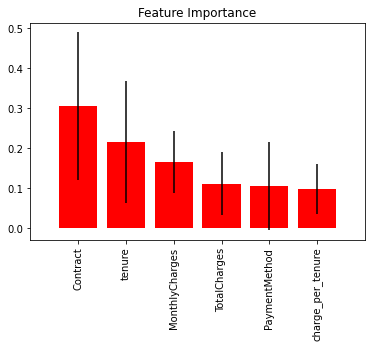

In [16]:
plot_feature_importances(rf, feature_names=new_features.columns, x_tick_rotation=90)

<AxesSubplot:xlabel='Contract', ylabel='count'>

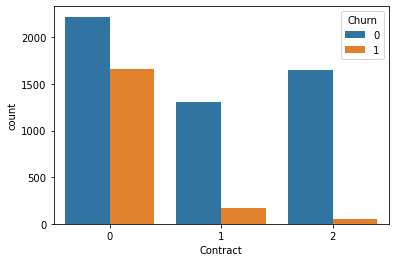

In [17]:
sns.countplot(data=df, x='Contract', hue='Churn')

# Summary

We again are using our telecom churn data, which has data about customers and whether the left or stayed with the company as customers (the Churn column). We broke up our churn data into features and targets, as well as train and test sets. We first fit a decision tree to our data to predict Churn. Starting with a max_depth of 10, we found a tree this deep significantly overfit the data. We lowered the max depth to 3 which improved the overfitting. It looks like the 'Contract' variable was used to first split the data, closely followed by the MonthlyCharges column. We see customers with month-to-month contract (Contract=0) seem to churn the most.

We next examined the correlations between features and the target (Churn). It looks like most features are moderately correlated with the target, except 'PhoneService' is not. From fitting a random forest and examining feature importances, it also looks like the PhoneService is not an important feature. Removing this feature resulted in a slighlty simpler model, but without any improvement in performance. It also changed the feature importances a little bit, moving our feature-engineered feature 'change_per_tenure' to the bottom of importances.